In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Summary Statistics

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Key observations
1. whole weight, viscera weight and shell weight has greater mean that its median
2. there's a large difference between 75th percentile and max in Height, Whole weight, Shucked weight, Shell weight
3. The 1 and 2 observations suggest that there are extreme outliers present in these columns

# Data Visualizations

<AxesSubplot:>

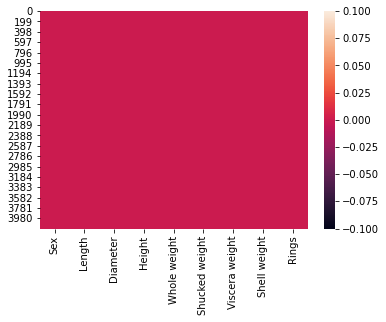

In [8]:
sns.heatmap(df.isnull())

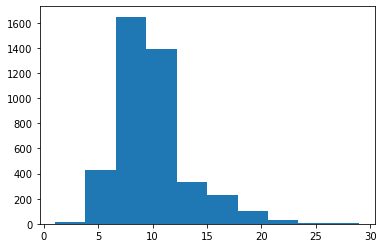

In [9]:
df['Rings'].hist(grid=False)
plt.show()

In [10]:
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

Target/dependent variable is a multi-class classification problem

ring score ranges from 1 to 29; where 1 is lowest and 28 is highest

Only scores obtained are between 1 to 29.

In [11]:
df.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

Observations:

Rings has most values concentrated in the values of 4,5,6,7,8,9,11,12,13,14,15,16,17,18 Few observations are present in 1,2,3,10,19,20,21,22,23,24,25,26,27,29

# Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

# Checking correlation

In [13]:
dff=df.corr()
dff

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

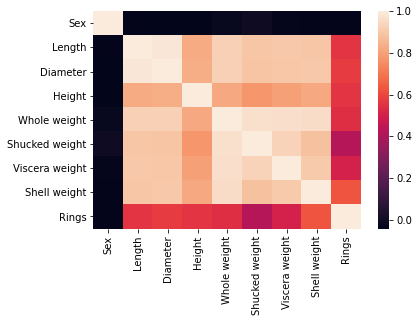

In [14]:
sns.heatmap(dff)

<AxesSubplot:>

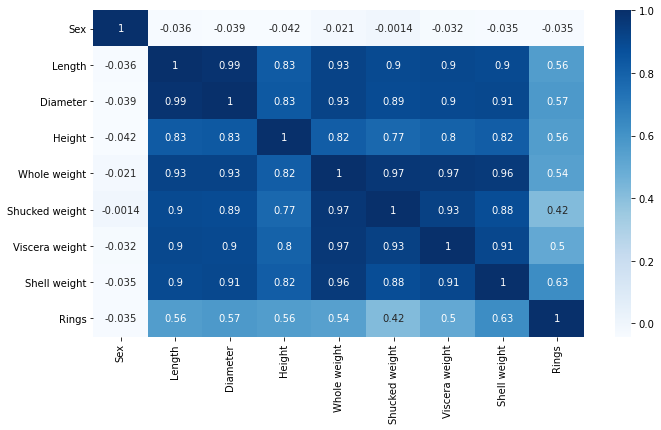

In [15]:
plt.figure(figsize=(11,6))
sns.heatmap(dff, cmap='Blues', annot=True)

In [16]:
corr_matrix= df.corr()
corr_matrix['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

# Plotting Outliers

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

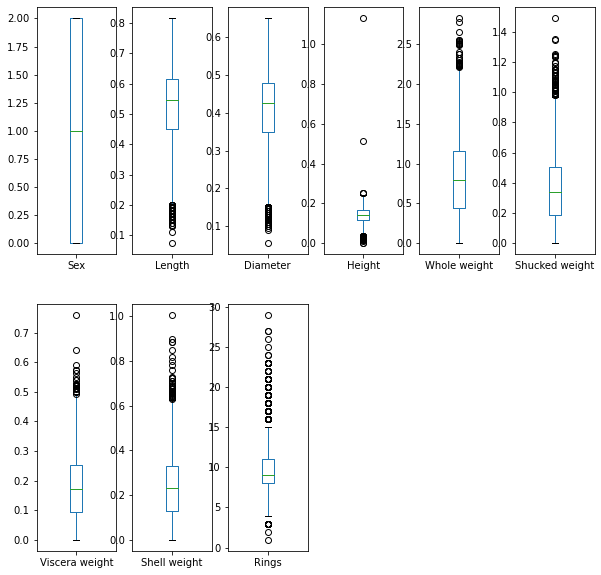

In [17]:
df.plot(kind='box', subplots=True, layout=(2,6), figsize=(10,10))

# To check distribution of skewness

In [18]:
x= df.drop('Rings',axis=1)
y= df['Rings']

In [19]:
x.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

In [20]:
from sklearn.preprocessing import power_transform
x_new= power_transform(x)
x= pd.DataFrame(x_new,columns=x.columns)

In [21]:
x.skew()

Sex              -0.176442
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

# Removing Outliers

In [22]:
from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [23]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [24]:
#row and column
z[4148][6]

3.1514857327663592

In [25]:
z[81][7]

3.1337140459935164

In [26]:
df_new= df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [27]:
df_new.shape

(4027, 9)

In [28]:
df.shape

(4177, 9)

In [29]:
#150 rows are deleted as outliers

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
max_accuracy=0
max_randomstate=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train, y_train)
    predrf= lr.predict(x_test)
    acc= accuracy_score(y_test, predrf)
    if acc>max_accuracy:
        max_accuracy=acc
        max_randomstate=i
print('Best accuracy is', max_accuracy,'on random_state', max_randomstate)

In [32]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.20, random_state=152)

In [33]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
predlr= lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.3181818181818182
[[ 0  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  8  9  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5 14 26  5  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  5 33 16 13  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  4 26 46 47 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 18 76 31  6  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  7 46 56 19  1  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  6 18 36 27  1  2  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 12 14 10  0  8  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  5 10  9  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 10  5  0  8  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  5  2  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  5  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  3  1  3  0  0  2  0  0  0  0  

# Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
preddtc= dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.20933014354066987
[[ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  3  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  3  7  6  3  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  6 13 13 10  4  3  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 16 20 12 12  4  1  0  1  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  3 10 20 34 40  9  9  4  3  2  0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  3  8 26 38 26 15 11  5  2  1  1  2  1  1  0  0  0  0  0]
 [ 0  0  0  0 12 16 25 28 23 16  4  2  3  1  3  2  0  2  0  0  0  0]
 [ 0  0  0  1  2  6 19 24 14  8  8  1  3  2  3  0  2  0  0  0  1  0]
 [ 0  0  0  0  0  4  8  6  9  7  6  2  1  2  2  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  3  6  5  5  4  4  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  3  3  7  2  3  1  2  2  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  0  2  1  2  1  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  1  1  0  2  1  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0 

# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
predrf= rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.2631578947368421
[[ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  6  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  6  9  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 23 15  9  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5 12 21 16 11  4  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  4 28 45 37 11  4  3  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 25 47 36 15  3  4  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5 11 39 43 31  4  2  1  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  7 23 24 26  3  6  1  2  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  5  8 12 13  3  4  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  3  6 13  2  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  6  9  4  1  2  1  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  4  0  1  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  2  2  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  2  3  3  1  0  0  0  0  0  0  

# SVC

In [36]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.3050239234449761
[[ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 10  9  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 15 30  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  6 33 13 14  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  4 29 44 47 10  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 25 71 37  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  6 52 57 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  7 23 40 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1 12 21 13  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4 11  6 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9 15  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  5  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  4  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  5  4  0  0  0  0  0  0  0  0  0  

Logistic Regression and SVC are producing good accuracy. Now we will check cross validation score as well for overfitting(if exists)

# Cross Validation Score

In [37]:
from sklearn.model_selection import cross_val_score

cr= cross_val_score(lr, x, y, cv=5)
print('Cross Validation score of Logistic Regression model is: ', cr.mean())

Cross Validation score of Logistic Regression model is:  0.26909406068246283


In [38]:
cr= cross_val_score(svc, x, y, cv=5)
print('Cross Validation score of SVC model is: ', cr.mean())

Cross Validation score of SVC model is:  0.2659805747356961


 Logistic Regression is perfoming better among all so we will continue with Logistic Regression 

# Hyper Parameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini','entropy']}

In [40]:
gsv= GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gsv.fit(x_train, y_train)  #fitting the data in model
gsv.best_params_ #printing the best parameters found by GridSearchCV

{'criterion': 'gini', 'max_depth' :7, 'max_features': 'sqrt'}

gsv_pred=gsv.best_estimator_.predict(x_test)   #predicting with best parameters
accuracy_score(y_test, gsv_pred)   #checking final accuracy

0.2966507177033493

# ROC AUC Plot

In [42]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [45]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

In [46]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

In [47]:
n_class = 28

In [48]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

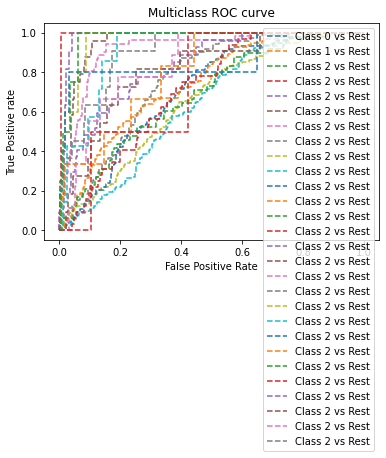

In [52]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[10], tpr[10],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[11], tpr[11],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[12], tpr[12],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[13], tpr[13], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[14], tpr[14],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[15], tpr[15],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[16], tpr[16],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[17], tpr[17], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[18], tpr[18],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[19], tpr[19],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[20], tpr[20],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[21], tpr[21], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[22], tpr[22],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[23], tpr[23],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[24], tpr[24],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[25], tpr[25], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[26], tpr[26],linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[27], tpr[27],linestyle='--',label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=800)

# Saving the model in pickle format


In [53]:
import joblib
joblib.dump(gsv.best_estimator_,'Abalone.pkl')

['Abalone.pkl']